<a href="https://colab.research.google.com/github/Nadeem786087/drug-response-prediction/blob/main/linear_model_geneY_ic50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model-Based Learning Example: Linear Regression on Drug Sensitivity

We want to predict how sensitive a cancer cell line is to a drug, using the expression level of a single gene (GeneY).

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 2: Create a small synthetic dataset
We're simulating a dataset where each cell line has:

An expression value for GeneY (normalized)
An experimentally measured IC50 value (lower IC50 = more sensitive to drug)

In [ ]:
# Step 2: Create a small synthetic dataset
data = {
    'GeneY_Expression': [0.8, 1.3, 2.1, 3.2, 4.0, 5.6, 6.2, 7.1, 8.3, 9.0],
    'IC50_nM': [120, 110, 95, 80, 65, 50, 38, 30, 20, 12]
}

df = pd.DataFrame(data)
df


,GeneY_Expression,IC50_nM
0,0.8,120
1,1.3,110
2,2.1,95
3,3.2,80
4,4.0,65
5,5.6,50
6,6.2,38
7,7.1,30
8,8.3,20
9,9.0,12


# Step 3: Visualize the raw data
This helps us explore whether there's a visible trend between GeneY expression and drug response.

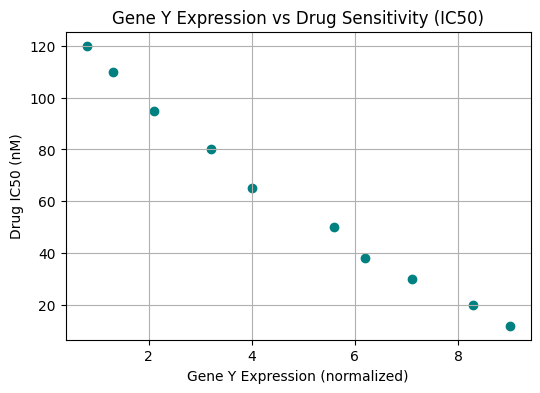

In [ ]:
# Scatter plot of the data
plt.figure(figsize=(6, 4))
plt.scatter(df["GeneY_Expression"], df["IC50_nM"], color='teal')
plt.xlabel("Gene Y Expression (normalized)")
plt.ylabel("Drug IC50 (nM)")
plt.title("Gene Y Expression vs Drug Sensitivity (IC50)")
plt.grid(True)
plt.show()

# Step 4: Prepare data for model training
Split the data into input features X and target labels y.

In [ ]:
# Features and targets
X = df[["GeneY_Expression"]]
y = df[["IC50_nM"]]

# Step 5: Select and train a linear regression model
We'll use Scikit-Learn's `LinearRegression` to learn a line of best fit.

In [ ]:
# Initialize and train the model

model = LinearRegression()
model.fit(X, y)


LinearRegression()

# Step 6: Visualize the trained model
We plot the regression line on top of the original data to see how well it fits.

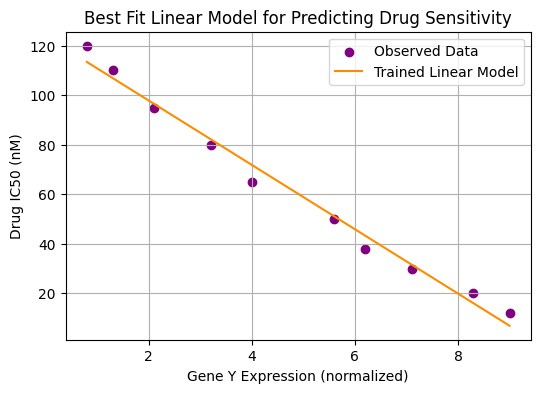

In [ ]:
# Plot 1: Data + fitted regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='purple', label='Observed Data')
plt.plot(X, model.predict(X), color='darkorange', label='Trained Linear Model')
plt.xlabel("Gene Y Expression (normalized)")
plt.ylabel("Drug IC50 (nM)")
plt.title("Best Fit Linear Model for Predicting Drug Sensitivity")
plt.legend()
plt.grid(True)
plt.show()

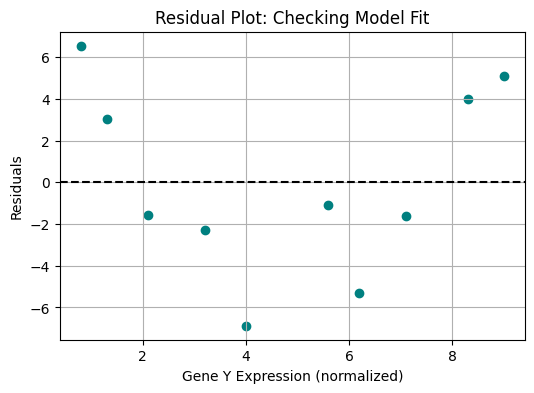

In [ ]:
# Plot 2: Residual plot
plt.figure(figsize=(6, 4))
residuals = y - model.predict(X)
plt.scatter(X, residuals, color='teal')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Gene Y Expression (normalized)")
plt.ylabel("Residuals")
plt.title("Residual Plot: Checking Model Fit")
plt.grid(True)
plt.show()

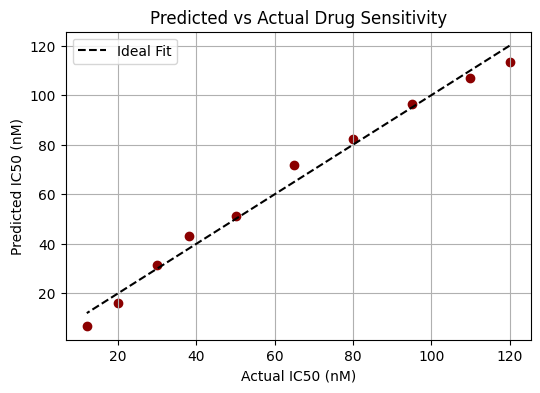

In [ ]:
# Plot 3: Predicted vs Actual values
plt.figure(figsize=(6, 4))
plt.scatter(y, model.predict(X), color='darkred')
plt.plot(y, y, color='black', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual IC50 (nM)")
plt.ylabel("Predicted IC50 (nM)")
plt.title("Predicted vs Actual Drug Sensitivity")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Make a prediction
Let’s say we encounter a new cell line with a GeneY expression level of 5.5. We can use our trained model to predict its drug sensitivity.

In [ ]:
new_expression = [[5.5]]
predicted_ic50 = model.predict(new_expression)
predicted_ic50

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52.38437206]])

# Step 8: Summary

What we just did:

- Created and explored a small synthetic dataset showing an inverse relationship between GeneY expression and drug IC50 values.
- Visualized the data to confirm that as GeneY expression increases, drug sensitivity (lower IC50) improves.
- Selected and trained a linear regression model using Scikit-Learn to quantify this relationship.
- Visualized the fitted model, residuals, and predicted vs actual values — all showing a strong linear trend and minimal error.
- Predicted IC50 for a new cell line with GeneY expression = 5.5, resulting in an estimated IC50 of approximately 52.38 nM.

**Conclusion:**  
Our model demonstrates that GeneY expression is a strong linear predictor of drug sensitivity. Higher gene expression levels are clearly associated with lower IC50 values, indicating greater drug responsiveness. This simple linear regression workflow effectively captures and explains the observed biological trend.
